<a href="https://colab.research.google.com/github/joaovfin/Projetos/blob/main/_05_Pyfolio_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalando bibliotecas e carregando-as
!pip install yfinance --upgrade --no-cache-dir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf
yf.pdr_override()

import seaborn as sns

!pip install git+https://github.com/quantopian/pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

####################

#Mais sobre pacote pyfolio
#https://towardsdatascience.com/the-easiest-way-to-evaluate-the-performance-of-trading-strategies-in-python-4959fd798bb3
#https://nbviewer.jupyter.org/format/slides/github/quantopian/pyfolio/blob/master/pyfolio/examples/pyfolio_talk_slides.ipynb#/

####################

In [2]:
#Definindo a nossa carteira para análise
tickers=["PETR4.SA",'VALE3.SA','COGN3.SA',"^BVSP"]
carteira=web.get_data_yahoo(tickers,period="3y")["Adj Close"]
carteira

[*********************100%***********************]  4 of 4 completed


,COGN3.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,
2018-04-30,13.457908,20.615494,42.329174,86115.000000
2018-05-02,13.064064,20.283424,42.363968,84547.000000
2018-05-03,12.727855,20.148798,42.694458,83288.000000
2018-05-04,12.756674,19.987249,43.224991,83118.000000
2018-05-07,12.718251,20.328295,42.824921,82714.000000
...,...,...,...,...
2021-04-23,3.960000,23.690001,107.989998,120530.000000
2021-04-26,3.990000,23.780001,108.570000,120595.000000
2021-04-27,3.960000,23.100000,110.120003,119388.000000


In [3]:
retorno=carteira.pct_change() #Função do pacote pandas
retorno

,COGN3.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,
2018-04-30,NaN,NaN,NaN,NaN
2018-05-02,-0.029265,-0.016108,0.000822,-0.018208
2018-05-03,-0.025735,-0.006637,0.007801,-0.014891
2018-05-04,0.002264,-0.008018,0.012426,-0.002041
2018-05-07,-0.003012,0.017063,-0.009256,-0.004861
...,...,...,...,...
2021-04-23,0.000000,-0.000843,0.016568,0.009709
2021-04-26,0.007576,0.003799,0.005371,0.000539
2021-04-27,-0.007519,-0.028595,0.014277,-0.010009


In [4]:
retorno=retorno.dropna()
retorno

,COGN3.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,
2018-05-02,-0.029265,-0.016108,0.000822,-0.018208
2018-05-03,-0.025735,-0.006637,0.007801,-0.014891
2018-05-04,0.002264,-0.008018,0.012426,-0.002041
2018-05-07,-0.003012,0.017063,-0.009256,-0.004861
2018-05-08,0.008308,0.011479,-0.001016,0.002926
...,...,...,...,...
2021-04-23,0.000000,-0.000843,0.016568,0.009709
2021-04-26,0.007576,0.003799,0.005371,0.000539
2021-04-27,-0.007519,-0.028595,0.014277,-0.010009


In [5]:
retorno_acum=(1+retorno).cumprod() #cumprod() é a soma acumulada
retorno_acum.iloc[0]=1
retorno_acum

,COGN3.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,
2018-05-02,1.000000,1.000000,1.000000,1.000000
2018-05-03,0.945753,0.977362,1.008630,0.967172
2018-05-04,0.947894,0.969526,1.021163,0.965198
2018-05-07,0.945039,0.986069,1.011712,0.960506
2018-05-08,0.952891,0.997388,1.010684,0.963316
...,...,...,...,...
2021-04-23,0.294251,1.149136,2.551195,1.399640
2021-04-26,0.296480,1.153501,2.564898,1.400395
2021-04-27,0.294251,1.120516,2.601516,1.386379


In [6]:
carteira=1000*retorno_acum.iloc[:,:3] #Todas as linhas e colunas apenas das ações (não quero IBOV)
carteira["Saldo"]=carteira.sum(axis=1) #Axis=1 somo as linhas e formo uma nova coluna "Saldo"
carteira["Retorno"]=carteira["Saldo"].pct_change() #Faço uma nova linha com os retornos da minha carteira
carteira

,COGN3.SA,PETR4.SA,VALE3.SA,Saldo,Retorno
Date,,,,,
2018-05-02,1000.000000,1000.000000,1000.000000,3000.000000,NaN
2018-05-03,945.752864,977.361891,1008.629603,2931.744358,-0.022752
2018-05-04,947.894288,969.525620,1021.163106,2938.583014,0.002333
2018-05-07,945.039269,986.068778,1011.711701,2942.819747,0.001442
2018-05-08,952.890731,997.387971,1010.684245,2960.962946,0.006165
...,...,...,...,...,...
2021-04-23,294.250795,1149.135732,2551.195489,3994.582017,0.010270
2021-04-26,296.479966,1153.501388,2564.897666,4014.879020,0.005081
2021-04-27,294.250795,1120.516473,2601.515509,4016.282778,0.000350


Start date,2018-05-02
End date,2021-04-29
Total months,35
,Backtest
Annual return,11.372%
Cumulative returns,36.968%
Annual volatility,40.816%
Sharpe ratio,0.47
Calmar ratio,0.21
Stability,0.07
Max drawdown,-54.671%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,54.67,2020-01-14,2020-03-23,2020-12-10,238
1,26.64,2018-05-16,2018-06-21,2018-10-03,101
2,21.14,2018-11-05,2018-12-20,2019-12-11,288
3,16.15,2021-01-08,2021-02-26,NaT,NaN
4,5.94,2018-10-08,2018-10-29,2018-11-05,21


Stress Events,mean,min,max
New Normal,0.08%,-21.19%,19.22%


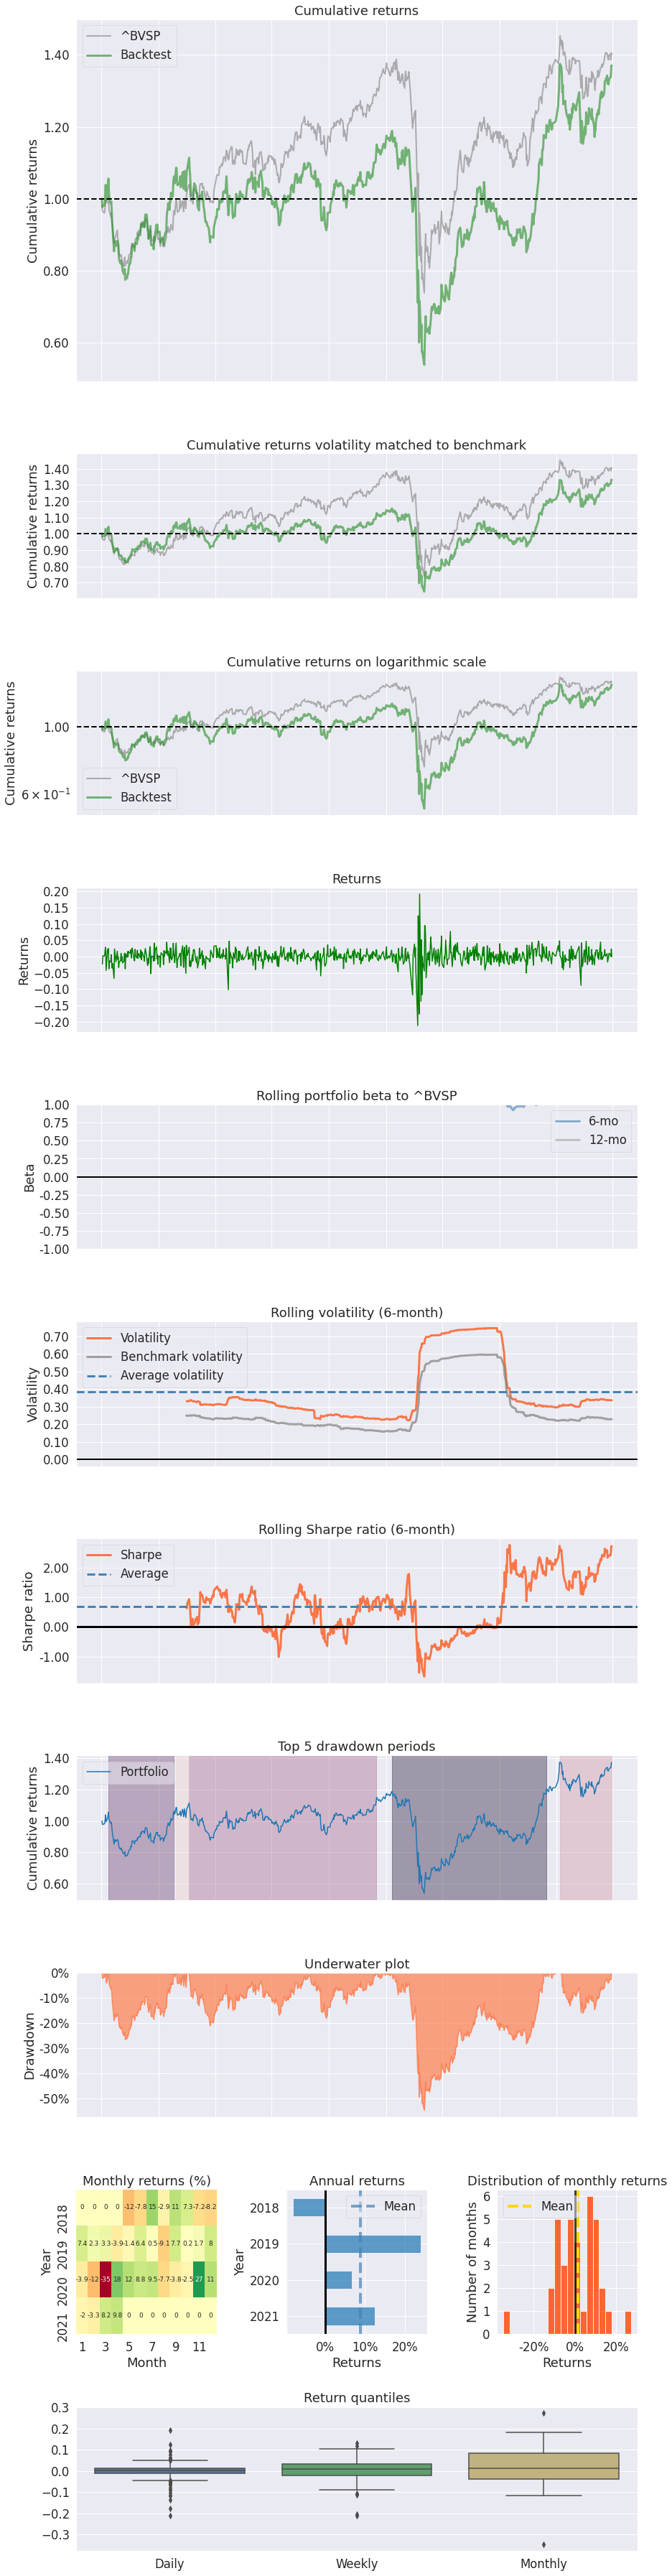

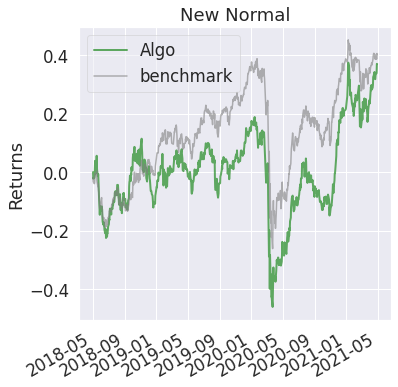

In [9]:
#Utilizando o pacote Pyfolio
#pf.create_simple_tear_sheet(carteira['Retorno'],benchmark_rets=retorno['^BVSP'])
pf.create_full_tear_sheet(carteira["Retorno"],benchmark_rets=retorno["^BVSP"])

(0.7, 1.6)

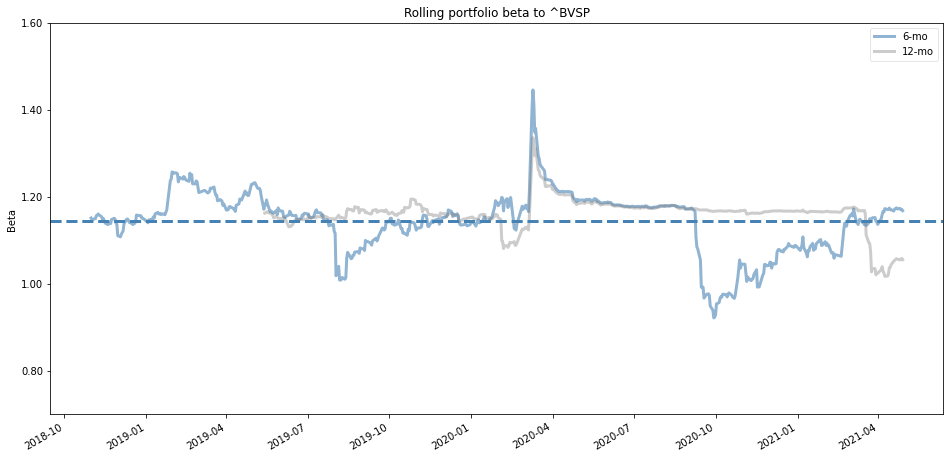

In [8]:
#Ajustando o gráfico Rolling Beta
fig, ax1=plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["Retorno"], factor_returns=retorno["^BVSP"],ax=ax1)
plt.ylim((0.70,1.6))